# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
#persiapan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba_test = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

## A. Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [9]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [10]:
# validation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.31


In [11]:
eval_classification(rf_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.90
Precision (Test Set): 0.83
Recall (Test Set): 0.05
F1-Score (Test Set): 0.10
roc_auc (test-proba): 0.67
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6860729387458049


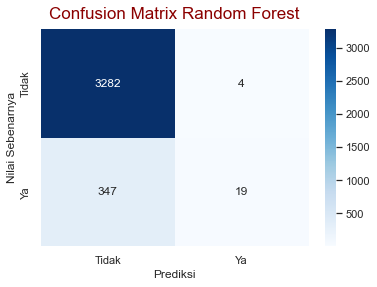

In [12]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Show confusion matrix in heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak', 'Ya'],
            yticklabels=['Tidak', 'Ya'])
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.title('Confusion Matrix Random Forest', pad = 10, fontsize = 17, color = 'darkred')
plt.show()

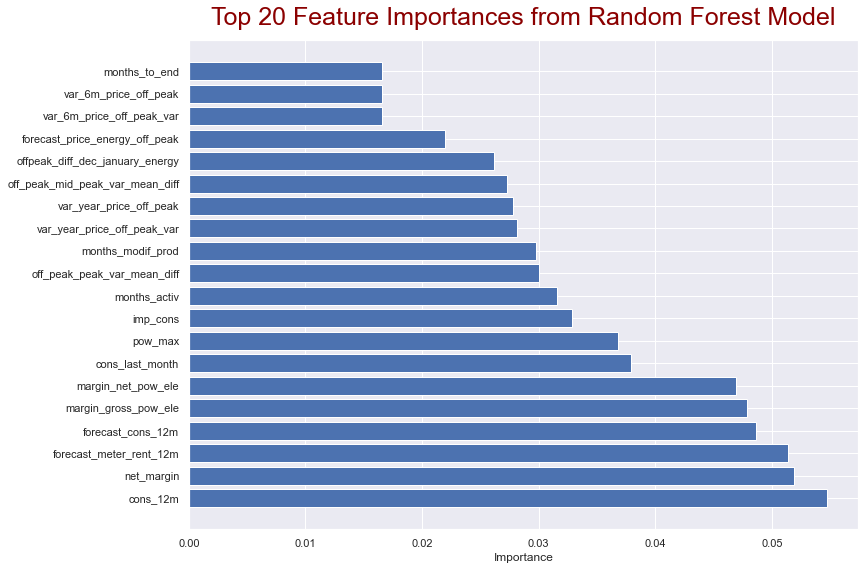

In [13]:
feature_importances = pd.DataFrame({'features': x_train.columns, 'importance': rf_model.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()

# top 10
top_20_feature_importances = feature_importances.nlargest(20, 'importance')

plt.figure(figsize=(12, 9))
plt.title('Top 20 Feature Importances from Random Forest Model', fontsize=25, color = 'darkred', pad = 15)
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:


a. Total net margin, margin on power subscription, and consumption over 12 months is a top driver for churn in this model

b. Time seems to be an influential factor, especially the number of months they have been active and the number of months since they updated their contract


Our price sensitivity features are not the main driver for a customer churning

## B. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [14]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.41


In [64]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.83
Precision (Test Set): 0.19
Recall (Test Set): 0.21
F1-Score (Test Set): 0.20
roc_auc (test-proba): 0.56
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.5540529567489358


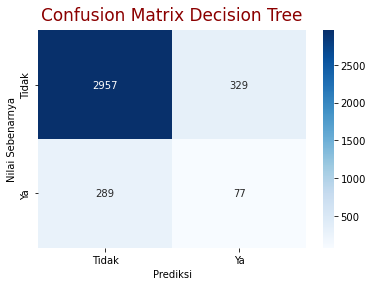

In [66]:
cm = confusion_matrix(y_test, y_pred)

# Show confusion matrix in heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak', 'Ya'],
            yticklabels=['Tidak', 'Ya'])
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.title('Confusion Matrix Decision Tree', pad = 10, fontsize = 17, color = 'darkred')
plt.show()

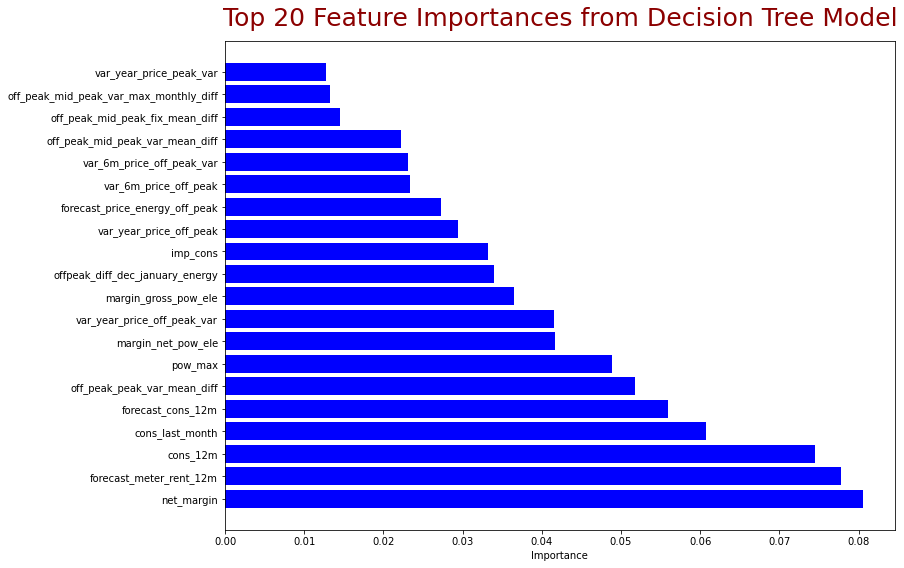

In [74]:
feature_importances = pd.DataFrame({'features': x_train.columns, 'importance': dt_model.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()

# top 10
top_20_feature_importances = feature_importances.nlargest(20, 'importance')

plt.figure(figsize=(12, 9))
plt.title('Top 20 Feature Importances from Decision Tree Model', fontsize=25, color = 'darkred', pad = 15)
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:


a. Total net margin, subscribed power, and consumption over 12 months is a top driver for churn in this model

b. Time seems to be an influential factor, especially the number of months they have been active and the number of months since they updated their contract


Our price sensitivity features are not the main driver for a customer churning

## 4. Conclusion

**From 2 models, we can see that the hypothesis is not accepted because price sensitivity is not a main driver but it is a weak contributor.**

Random forest and Decision tree models used because both can be used for classification and regression tasks. Random forest model seems to perform better overall on the test set compared to Model Decision tree model, despite having slightly lower performance on some metrics on the train set.